# Extra Examples - TimeSeries

Like many people, I wonder where my life would be if I just bought some bitcoins back in 2009. So let's rub salt into the wound with this crypto dataset: https://www.kaggle.com/taniaj/cryptocurrency-market-history-coinmarketcap

Our exercise is thus:

1. Index the df by symbol and date
2. Find the top 5 symbols with the highest market cap (over all time)
3. Plot those samples - date vs closing price
4. Its a bit hard to see, smooth the plots with a window of 5 days
4. Create a new column that indicates a simple 1 or 0 for growth or not growth (compared to prev day)
5. Idenify regions in the top coin where we had positive growth for an entire fortnight (aka 10 entries, using the above col)

In [20]:
import pandas as pd

df = pd.read_csv("all_currencies.csv", index_col=0, parse_dates=["Date"])
df.head()

Date Symbol      Open      High       Low     Close  Volume  \
0 2015-11-12    $$$  0.000013  0.000017  0.000013  0.000017   142.0   
1 2015-11-13    $$$  0.000017  0.000033  0.000016  0.000024    85.0   
2 2015-11-14    $$$  0.000024  0.000053  0.000023  0.000030   131.0   
3 2015-11-15    $$$  0.000030  0.000063  0.000022  0.000035   132.0   
4 2015-11-16    $$$  0.000035  0.000046  0.000032  0.000036   280.0   

   Market Cap  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

## Setting the index

In [21]:
df2 = df.set_index(["Symbol", "Date"])
df2.head()

Open      High       Low     Close  Volume  Market Cap
Symbol Date                                                                  
$$$    2015-11-12  0.000013  0.000017  0.000013  0.000017   142.0         NaN
       2015-11-13  0.000017  0.000033  0.000016  0.000024    85.0         NaN
       2015-11-14  0.000024  0.000053  0.000023  0.000030   131.0         NaN
       2015-11-15  0.000030  0.000063  0.000022  0.000035   132.0         NaN
       2015-11-16  0.000035  0.000046  0.000032  0.000036   280.0         NaN

## Finding the highest 5 market cap symbols

In [69]:
# Can use the original dataframe here if we want
symbols = df.groupby("Symbol")["Market Cap"].max().sort_values(ascending=False).index[:5].to_list()
symbols

['BTC', 'ETH', 'XRP', 'BCH', 'ADA']

## Plotting the closing price for those five symbols

In [115]:
idx = pd.IndexSlice
df_5 = df2.loc[idx[symbols, :]].copy()
df_5

Open      High       Low     Close        Volume  \
Symbol Date                                                               
ADA    2017-10-01  0.021678  0.032226  0.017354  0.024969  5.006870e+07   
       2017-10-02  0.024607  0.030088  0.019969  0.025932  5.764130e+07   
       2017-10-03  0.025757  0.027425  0.020690  0.020816  1.699780e+07   
       2017-10-04  0.020864  0.022806  0.020864  0.021931  9.000050e+06   
       2017-10-05  0.021951  0.022154  0.020859  0.021489  5.562510e+06   
...                     ...       ...       ...       ...           ...   
XRP    2018-09-23  0.575220  0.595025  0.559651  0.570689  1.043970e+09   
       2018-09-24  0.570614  0.580377  0.489646  0.494712  1.034380e+09   
       2018-09-25  0.487622  0.546061  0.441519  0.526941  1.639680e+09   
       2018-09-26  0.520288  0.566711  0.491498  0.516308  1.821610e+09   
       2018-09-27  0.516478  0.550922  0.513967  0.541381  8.240830e+08   

                     Market Cap  
Symbol Date                      
ADA    2017-10-01           NaN  
       2017-10-02           NaN  
       2017-10-03  6.246507e+08  
       2017-10-04  5.409455e+08  
       2017-10-05  5.691340e+08  
...                         ...  
XRP    2018-09-23  2.289899e+10  
       2018-09-24  2.271562e+10  
       2018-09-25  1.944193e+10  
       2018-09-26  2.074436e+10  
       2018-09-27  2.059243e+10  

[5802 rows x 6 columns]

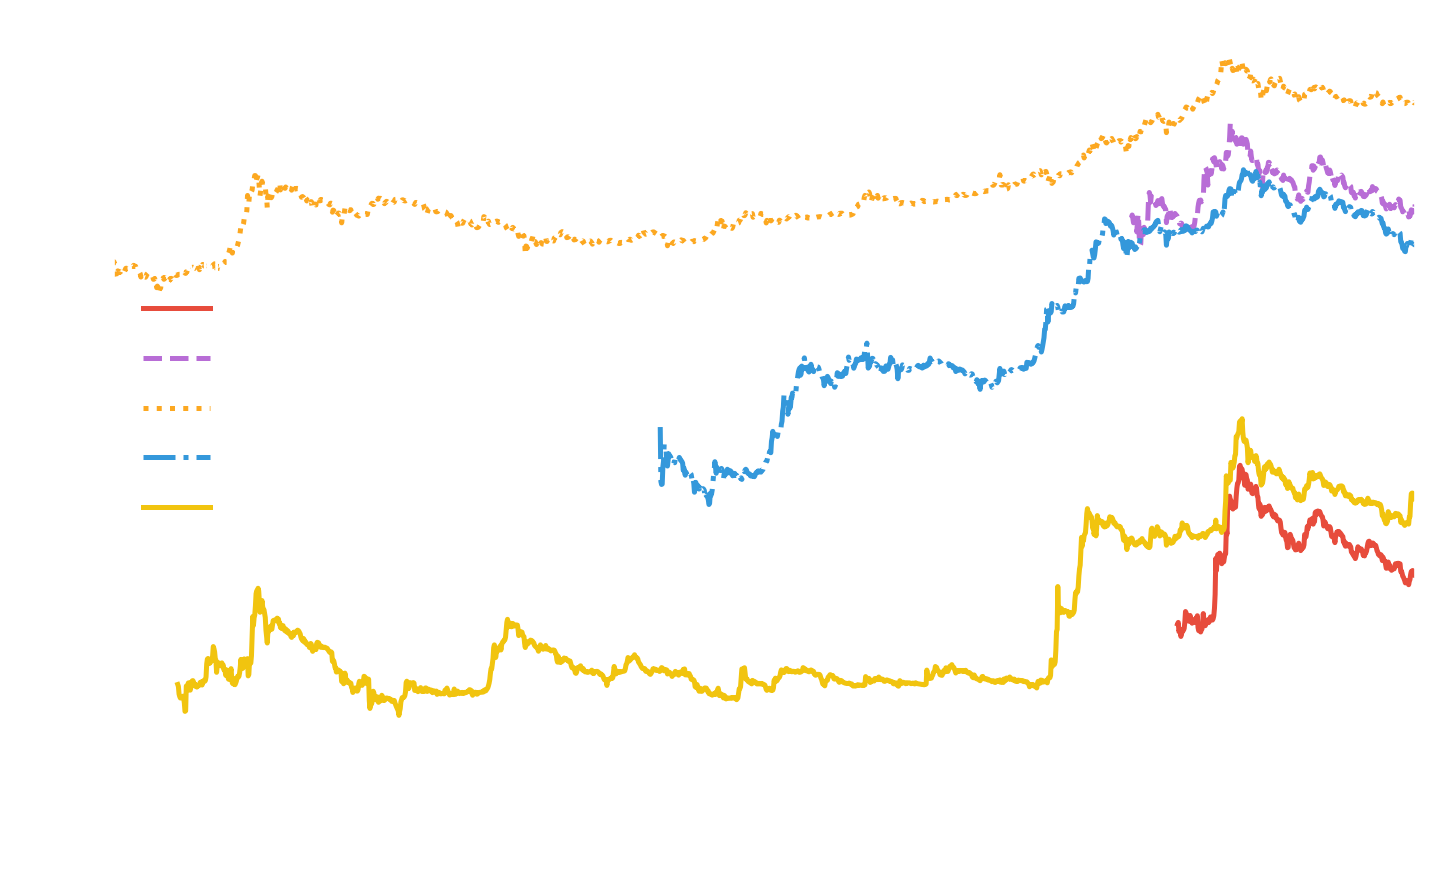

In [116]:
df_5.Close.unstack().T.plot(logy=True);

## Smooth it out

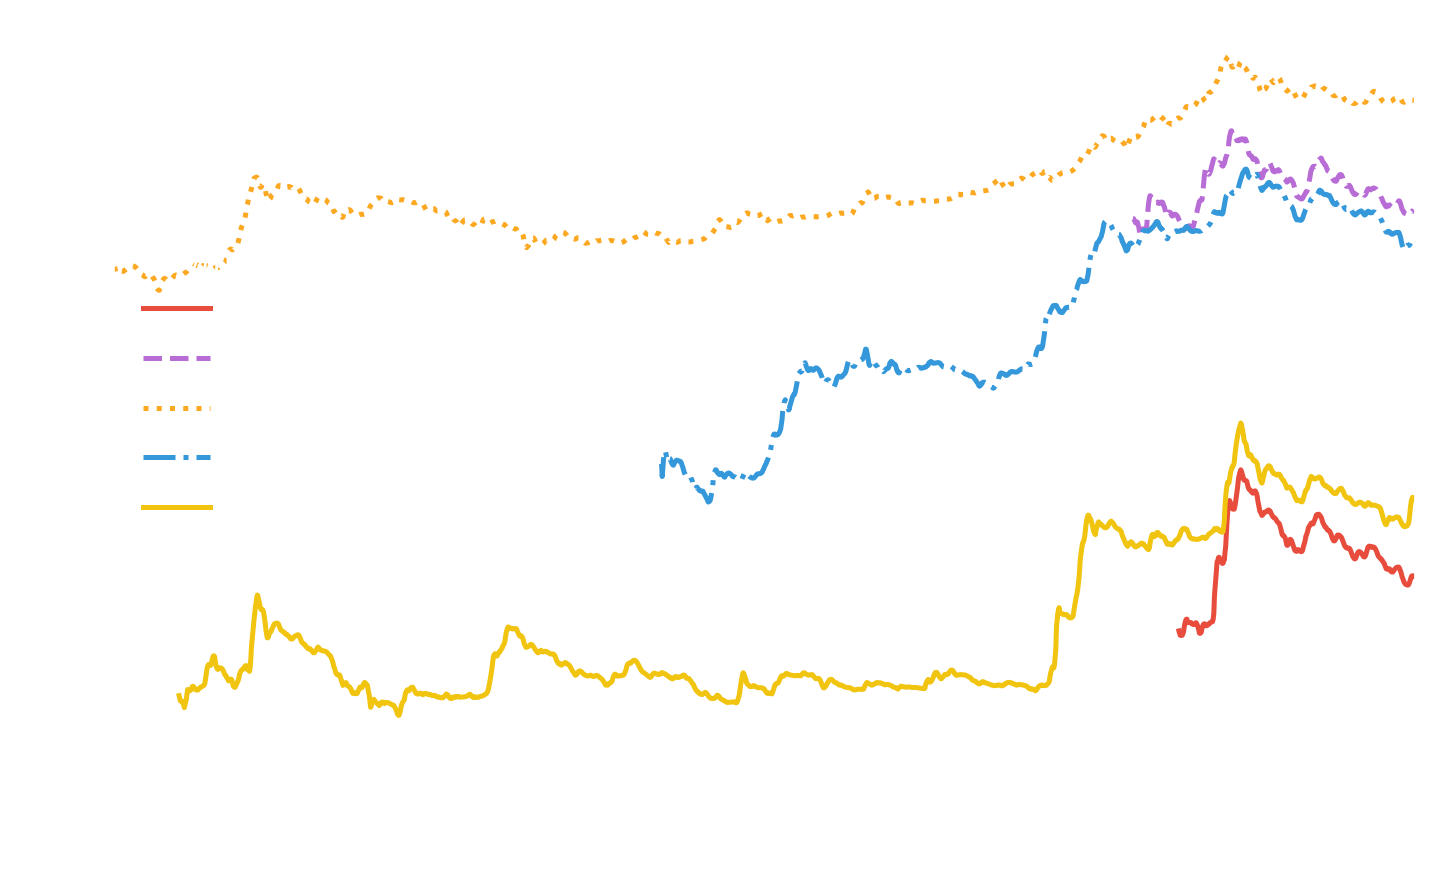

In [117]:
def roll(x):
    return x.rolling(window=5, center=True, min_periods=5).mean()
rolled = df_5.groupby(level="Symbol").Close.apply(roll)
rolled.unstack().T.plot(logy=True);

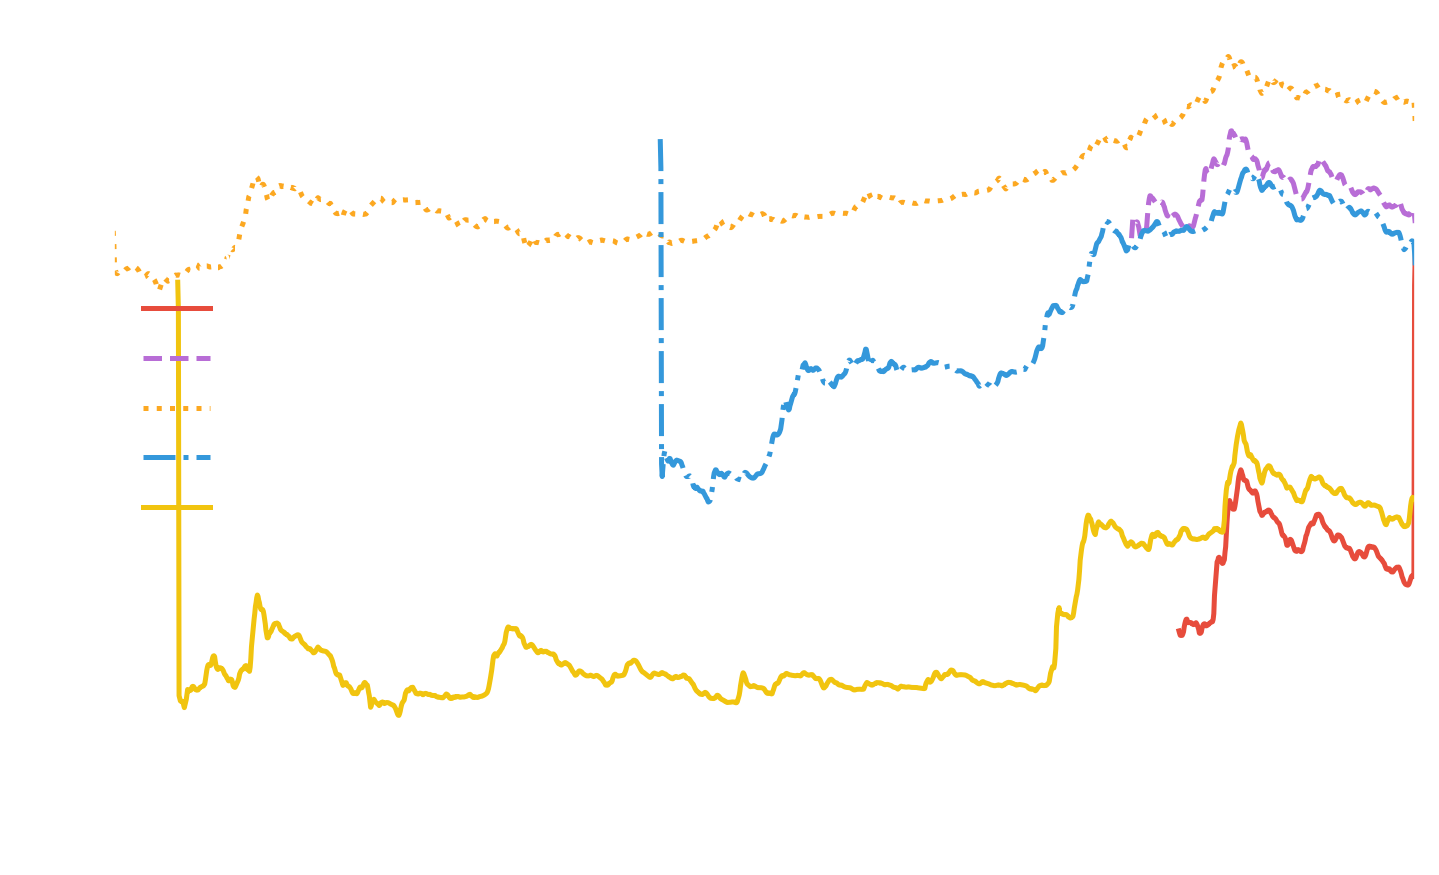

In [118]:
# Notice what happens if we dont groupby and just go straight to rolling
# Rolling doesnt care about our symbol, so see the 
# spikes on XRP where its using non-XRP data
df_5.Close.rolling(window=5, center=True, min_periods=5).mean().unstack().T.plot(logy=True);

## Create new column for growth

In [120]:
df_5["Growth"] = (df_5.groupby("Symbol").Close.diff() > 0).astype(int)
df_5

Open      High       Low     Close        Volume  \
Symbol Date                                                               
ADA    2017-10-01  0.021678  0.032226  0.017354  0.024969  5.006870e+07   
       2017-10-02  0.024607  0.030088  0.019969  0.025932  5.764130e+07   
       2017-10-03  0.025757  0.027425  0.020690  0.020816  1.699780e+07   
       2017-10-04  0.020864  0.022806  0.020864  0.021931  9.000050e+06   
       2017-10-05  0.021951  0.022154  0.020859  0.021489  5.562510e+06   
...                     ...       ...       ...       ...           ...   
XRP    2018-09-23  0.575220  0.595025  0.559651  0.570689  1.043970e+09   
       2018-09-24  0.570614  0.580377  0.489646  0.494712  1.034380e+09   
       2018-09-25  0.487622  0.546061  0.441519  0.526941  1.639680e+09   
       2018-09-26  0.520288  0.566711  0.491498  0.516308  1.821610e+09   
       2018-09-27  0.516478  0.550922  0.513967  0.541381  8.240830e+08   

                     Market Cap  Growth  
Symbol Date                              
ADA    2017-10-01           NaN       0  
       2017-10-02           NaN       1  
       2017-10-03  6.246507e+08       0  
       2017-10-04  5.409455e+08       1  
       2017-10-05  5.691340e+08       0  
...                         ...     ...  
XRP    2018-09-23  2.289899e+10       0  
       2018-09-24  2.271562e+10       0  
       2018-09-25  1.944193e+10       1  
       2018-09-26  2.074436e+10       0  
       2018-09-27  2.059243e+10       1  

[5802 rows x 7 columns]

## Determine periods of a stable growth in the top coin

Note we're glossing over potentially missing days, etc. We could resample to fix this, but let's keep it a bit simple. You should be able to reuse some of the rolling code above to do this.

In [139]:
df_top = df_5.xs(symbols[0])

stable = (df_top.Growth.rolling(window=10, min_periods=10).mean() == 1)
stable.index[stable].to_list()

[Timestamp('2013-11-09 00:00:00'),
 Timestamp('2017-05-08 00:00:00'),
 Timestamp('2017-05-09 00:00:00'),
 Timestamp('2017-05-10 00:00:00'),
 Timestamp('2017-05-11 00:00:00'),
 Timestamp('2017-10-14 00:00:00')]

If your result agrees with mine, it looks like 2017 was a great year for bitcoin, with lots of stable growth in May.